# Итоговое задание по курсу "Python для анализа данных"

In [102]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

1. Загрузите файл HR.csv в pandas dataframe

In [103]:
# импортируем файл в датафрейм
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [104]:
# информация по файлу
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


В ДФ 14999 строк, пропусков нет. С форматами все в порядке, с данными можно работать без дополнительных манипуляций.

2. Рассчитайте основные статистики для переменных (среднее, медиана, мода, мин/макс, сред.отклонение).

In [105]:
# среднее, мин/макс и СКО посмотрим сразу по всем столбцам при помощи функции describe
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [106]:
# отдельно рассчитаем по столбцам медианы
df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']].median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [107]:
# и моды
df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']].mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN


Судя по средним и медианным значениям, значительных выбросов, влияющих на анализ данных, в выборке нет. Визуализируем, чтобы убедиться, но для начала уменьшим размерность среднего количества часов в месяц, чтобы корректно отобразить график.

In [108]:
df_copy = df.copy()
df_copy['average_montly_hours'] = df_copy['average_montly_hours']/100
df_copy.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,1.57,3,0,1,0,sales,low
1,0.80,0.86,5,2.62,6,0,1,0,sales,medium
2,0.11,0.88,7,2.72,4,0,1,0,sales,medium
3,0.72,0.87,5,2.23,5,0,1,0,sales,low
4,0.37,0.52,2,1.59,3,0,1,0,sales,low


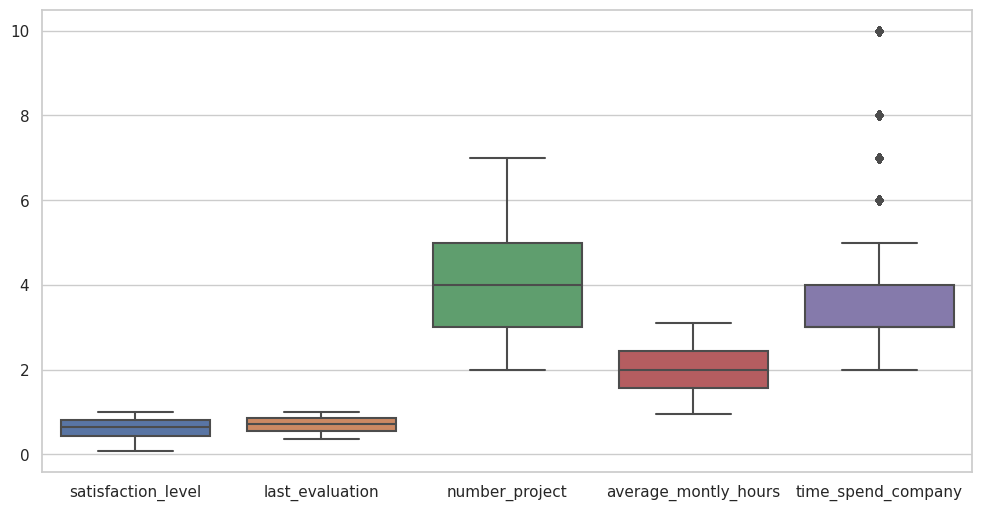

In [109]:
# среднее количество часов в месяц
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_copy[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']])
plt.show()

Есть несколько выбросов по стажу работы, но учитывая, что они находятся в диапазоне от 6 до 10 лет, выбросы не выглядят ошибками в данных. Старожилы в компании, бывает.

3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.

  Определите две самые скоррелированные и две наименее
скоррелированные переменные.

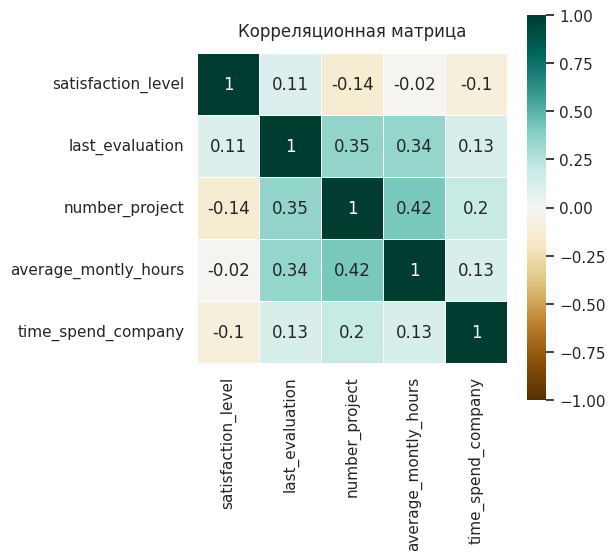

In [110]:
plt.figure(figsize=(5, 5))

# передаем в тепловую карту только столбцы с количественными переменными
# добавляем атрибут annot для выведения значений и используем контрастную цветовую схему
heatmap = sns.heatmap(df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr(),
                      vmin=-1,
                      vmax=1,
                      annot=True,
                      cmap='BrBG',
                      linewidths=0.7,
                      linecolor='white',
                      square=True
                      )
heatmap.set_title('Корреляционная матрица', fontdict={'fontsize':12}, pad=12)
plt.show()

Наибольшая корреляция наблюдается между следующими данными:
* количество выполненных проектов – среднее количество часов на рабочем месте
* количество выполненных проектов – время, прошедшее с последней оценки сотрудника.

В обоих случаях корреляция прямая. Значения коэффициента говорят об умеренной корреляции.

Практически отсутствует корреляция между следующими данными:
* уровень удовлетворенности работой – среднее количество часов в месяц
* уровень удовлетворенности работой – стаж работы в компании.

Посмотрим на графиках

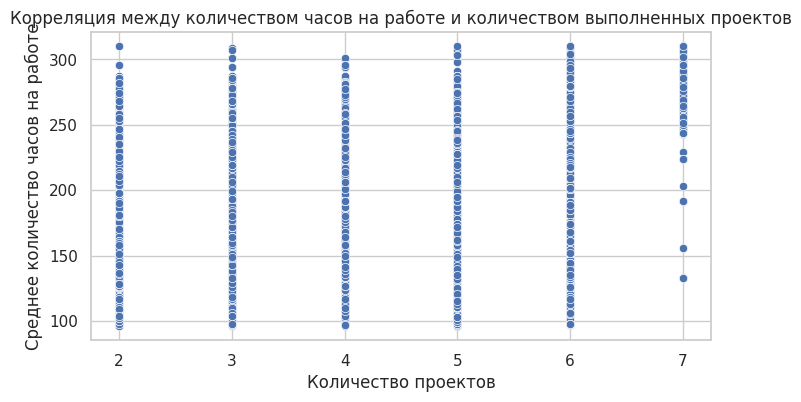

In [111]:
# сначала корреляция между часами на работе и количеством проектов
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df,
                x="number_project",
                y="average_montly_hours"
                )
plt.title('Корреляция между количеством часов на работе и количеством выполненных проектов')
plt.xlabel('Количество проектов')
plt.ylabel('Среднее количество часов на работе')
plt.show()

Наблюдается довольно слабая, но все же выраженная закономерность: мало сотрудников, работающих меньше 250 часов, которые успевают сделать 7 проектов, и вместе с тем мало сотрудников, работающих по 300 часов, которые сделали всего 2 проекта. В основном успевают сделать больше.

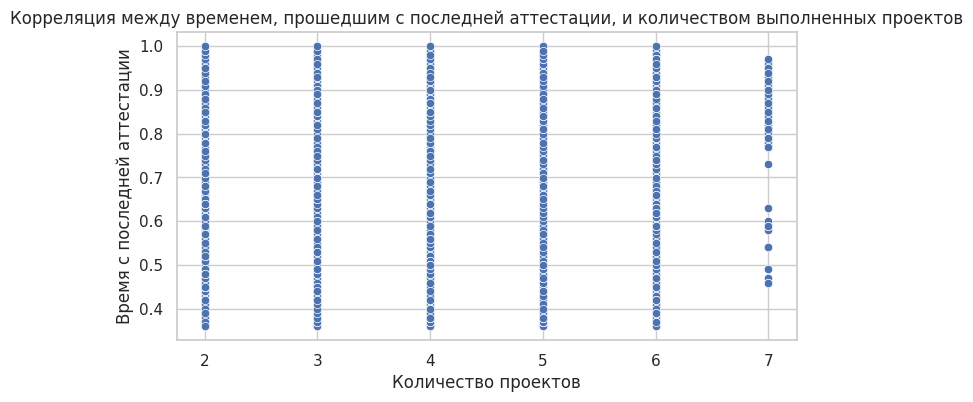

In [112]:
# теперь корреляция между временем с последней аттестации и количеством проектов
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df,
                x="number_project",
                y="last_evaluation"
                )
plt.title('Корреляция между временем, прошедшим с последней аттестации, и количеством выполненных проектов')
plt.xlabel('Количество проектов')
plt.ylabel('Время с последней аттестации')
plt.show()

Во втором случае корреляция вообще довольно условная и заключается лишь в том, что по семь проектов успели сделать сотрудники с бОльшим временем, прошедшим с последней аттестации. В этом просматривается логика: вероятно, малые сроки с последней аттестации приходятся на новых сотрудников, которые еще не успели наработать достаточное портфолио.

4. Рассчитайте сколько сотрудников работает в каждом
департаменте.

In [113]:
for i in df['department'].unique():
  print(f"В отделе {i} работает сотрудников: {len(df[df['department'] == i])}")

В отделе sales работает сотрудников: 4140
В отделе accounting работает сотрудников: 767
В отделе hr работает сотрудников: 739
В отделе technical работает сотрудников: 2720
В отделе support работает сотрудников: 2229
В отделе management работает сотрудников: 630
В отделе IT работает сотрудников: 1227
В отделе product_mng работает сотрудников: 902
В отделе marketing работает сотрудников: 858
В отделе RandD работает сотрудников: 787


5. Показать распределение сотрудников по зарплатам.

In [114]:
# выводим количество сотрудников для каждого уникального значения уровня зарплат
for i in df['salary'].unique():
  print(f"Зарплату {i} получает сотрудников: {len(df[df['salary'] == i])}")

Зарплату low получает сотрудников: 7316
Зарплату medium получает сотрудников: 6446
Зарплату high получает сотрудников: 1237


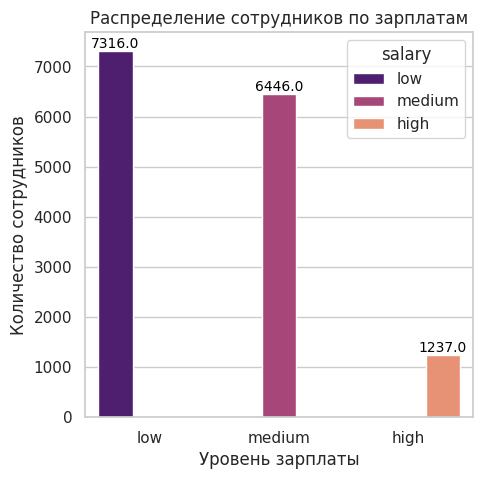

In [115]:
# создаем отдельный дф для сотрудников, сгруппированный по уровням зарплат
grouped_salary = df.groupby(['salary']).size().reset_index(name='count')

# задаем порядок зарплат от меньшей к большей для более наглядной визуализации
salary_order = ['low', 'medium', 'high']
grouped_salary['salary'] = pd.Categorical(grouped_salary['salary'], categories=salary_order, ordered=True)

plt.figure(figsize=(5, 5))

ax = sns.barplot(data=grouped_salary, x='salary', y='count', hue='salary', palette='magma')

# присваиваем значения для отображения на столбцах
for p in ax.patches:
  ax.annotate(f'{p.get_height()}',
              (p.get_x() + p.get_width() / 2, p.get_height()),
              ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
              textcoords='offset points')

# настройки графика
plt.title('Распределение сотрудников по зарплатам')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.show()

6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности.

In [116]:
# группируем датафрейм по отделам и зарплатам, считаем количества
grouped = df.groupby(['department', 'salary']).size().reset_index(name='count')
print(grouped)

     department  salary  count
0            IT    high     83
1            IT     low    609
2            IT  medium    535
3         RandD    high     51
4         RandD     low    364
5         RandD  medium    372
6    accounting    high     74
7    accounting     low    358
8    accounting  medium    335
9            hr    high     45
10           hr     low    335
11           hr  medium    359
12   management    high    225
13   management     low    180
14   management  medium    225
15    marketing    high     80
16    marketing     low    402
17    marketing  medium    376
18  product_mng    high     68
19  product_mng     low    451
20  product_mng  medium    383
21        sales    high    269
22        sales     low   2099
23        sales  medium   1772
24      support    high    141
25      support     low   1146
26      support  medium    942
27    technical    high    201
28    technical     low   1372
29    technical  medium   1147


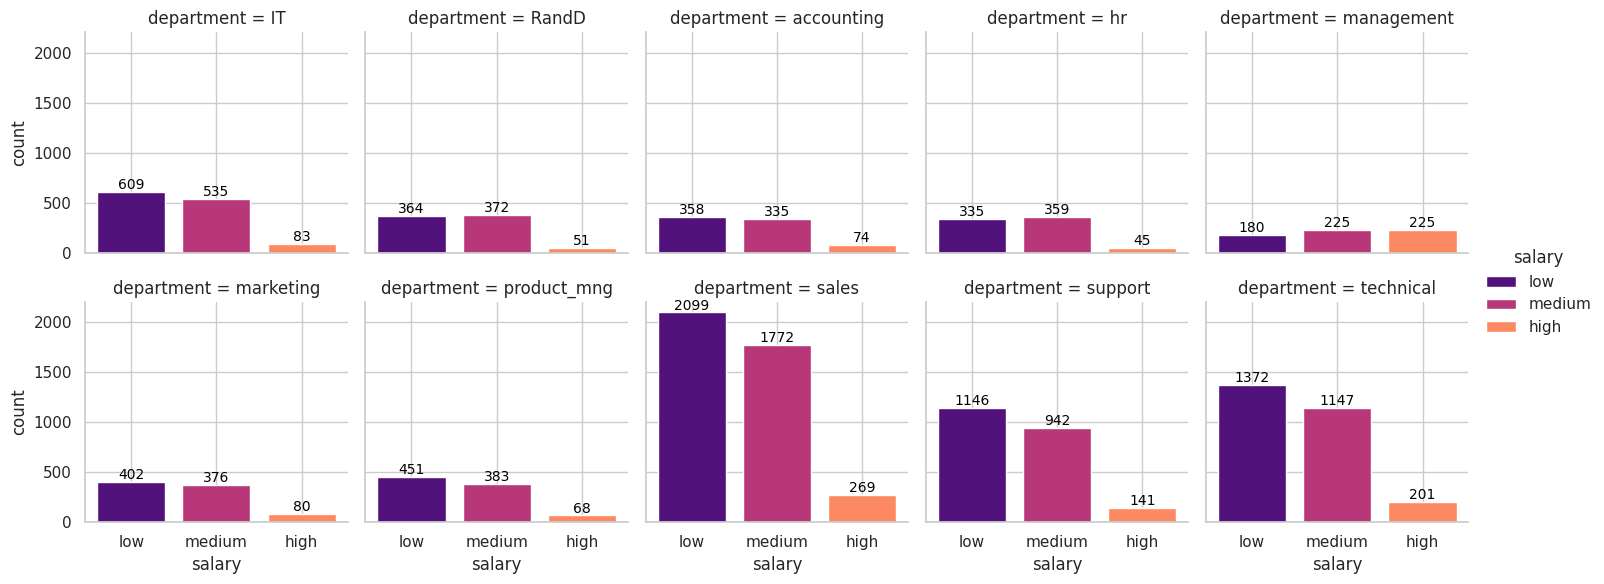

In [117]:
# визуализируем

# для начала задаем порядок зарплат от меньшей к большей для более наглядной визуализации
salary_order = ['low', 'medium', 'high']
grouped['salary'] = pd.Categorical(grouped['salary'], categories=salary_order, ordered=True)

# задаем сетку
salaries_grid = sns.FacetGrid(grouped,
                              col='department',
                              col_wrap=5,
                              hue='salary',
                              palette='magma',
                              )
salaries_grid.map(plt.bar, 'salary', 'count')

# присваиваем значения для отображения на столбцах
for ax in salaries_grid.axes:
  for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# добавляем легенду и выводим результат
salaries_grid.add_legend()
plt.show()

7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

In [118]:
# создаем датафреймы для сотрудников с высокими окладами и всех остальных
df_high = df[df['salary'] == 'high']
df_low = df[df['salary'] == 'low']

Ранее мы видели, что по столбцу со средним временем работы две моды. Поэтому желательно визуализировать лдя оценки распределения вероятностей.

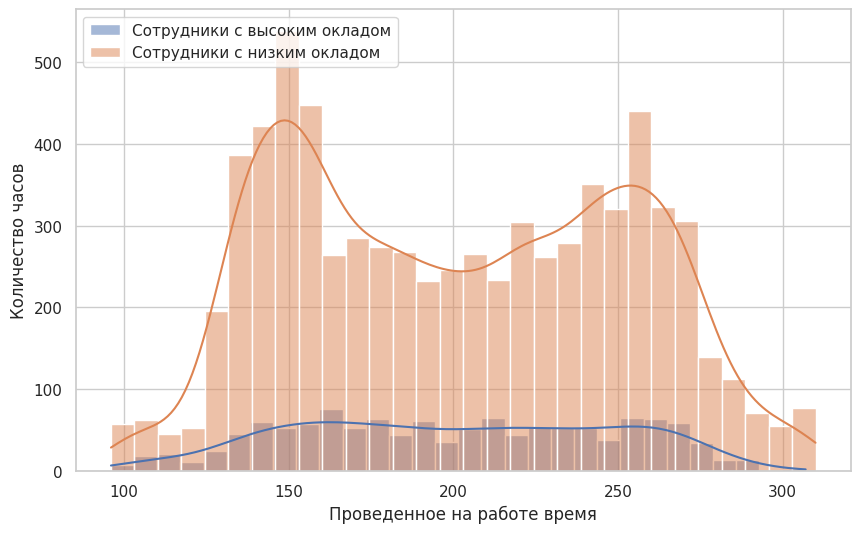

In [119]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.histplot(df_high, x='average_montly_hours', kde=True, bins=30, label='Сотрудники с высоким окладом')
sns.histplot(df_low, x='average_montly_hours', kde=True, bins=30, label='Сотрудники с низким окладом')
plt.xlabel("Проведенное на работе время")
plt.ylabel("Количество часов")
plt.legend(loc='upper left')
plt.show()

Зарплаты сотрудников с низким окладом распределяются бимодально. Применять t-тест в данном случае некорректно, поэтому нулевую гипотезу будем проверять тестом Манна-Уитни.

Сформулируем гипотезы:

H0: значимой разницы между временем, проведенным на работе, у сотрудников с высокими и низкими окладами, нет.

H1: сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

In [120]:
# считаем статистику
stats, p_value = st.mannwhitneyu(df_high['average_montly_hours'], df_low['average_montly_hours'])

# задаем уровень значимости
alpha = 0.05

print("Статистика теста:", stats)
print("p-значение:", p_value)

# выводим результат
if p_value < alpha:
  print("Отклоняем нулевую гипотезу, результаты имеют статистически значимые различия")
else:
  print("Не отклоняем нулевую гипотезу, у результатов нет статистически значимых различий")

Статистика теста: 4507096.5
p-значение: 0.8241330720858693
Не отклоняем нулевую гипотезу, у результатов нет статистически значимых различий


8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [121]:
# создаем отдельные таблицы для уволившихся и действующих сотрудников
df_left = df[df['left'] == 1]
df_not_left = df[df['left'] == 0]

# рассчитываем данные
print("Доля сотрудников с повышением за последние 5 лет:")
print(f"– среди действующих сотрудников – {round(len(df_not_left[df_not_left['promotion_last_5years'] == 0])/len(df_not_left)*100, 2)}%")
print(f"– среди уволившихся сотрудников – {round(len(df_left[df_left['promotion_last_5years'] == 1])/len(df_left)*100, 2)}%")
print()
print("Средний уровень удовлетворенности работой:")
print(f"– среди действующих сотрудников – {round(df_not_left['satisfaction_level'].mean()*100, 2)}%")
print(f"– среди уволившихся сотрудников – {round(df_left['satisfaction_level'].mean()*100, 2)}%")
print()
print("Выполнено в среднем проектов:")
print(f"– действующими сотрудниками – {round(df_not_left['number_project'].mean()*100, 2)} проектов")
print(f"– уволившимися сотрудниками – {round(df_left['number_project'].mean()*100, 2)} проектов")

Доля сотрудников с повышением за последние 5 лет:
– среди действующих сотрудников – 97.37%
– среди уволившихся сотрудников – 0.53%

Средний уровень удовлетворенности работой:
– среди действующих сотрудников – 66.68%
– среди уволившихся сотрудников – 44.01%

Выполнено в среднем проектов:
– действующими сотрудниками – 378.67 проектов
– уволившимися сотрудниками – 385.55 проектов


Оценка результатов:
среди уволившихся сотрудников крайне низкий процент повышений за последние пять лет и меньшая по сравнению с действующими сотрудниками удовлетворенность работой. При этом в среднем данные сотрудники выполняли больше проектов, чем действующий персонал компании. Предположительно можно сделать вывод, что компанию покидали сотрудники, выполнявшие большой объем работы, но не получавшие за это справедливую оценку в виде повышений.

9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).

  Оценить качество модели на тестовой выборки

In [169]:
# импортируем необходимые методы
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

In [145]:
# определяем факторы влияния и цель
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df['left']

In [149]:
# разделяем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [150]:
# обучаем модель
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [151]:
# проводим предсказание на тестовых значениях
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 1 0]


In [136]:
# посчитаем количество неверно предсказанных значений
print((y_test != y_pred).sum())

924


In [176]:
# считаем эффективность модели
print(f'Эффективность модели – {model.score(X_test, y_test)*100}%')

Эффективность модели – 75.36%


In [160]:
# выводим в одну тублицу результаты реальной тестовой выборки и предсказания модели
y_test = y_test.reset_index()
result = pd.DataFrame([y_test['left'], y_pred]).T
result.head(20)

Вывод: с точки зрения чисел эффективность модели невысокая. В 25% случаев она ошибается. Вероятно, рещультат связан с тем, что между многими параметрами очень слабая или вовсе отсутствующая корреляция.
С другой стороны, если говорить о предсказании увольнения сотрудников, то благодаря модели с такой точностью компания будет терять лишь каждого четвертого сотрудника из-за ошибочного прогноза. Остальных благодаря прогнозу модели будет шанс сохранить.